<b>Book Recommdation System

202211036- Arjun Vankani

202211014- Nikunj Rathod

202211019- Jainisha Choksi

202211055- Prathamesh Potdar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
books = pd.read_csv("/content/drive/MyDrive/book-recomd/Books.csv")
books.shape

<ipython-input-3-80c9da8c43fe>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("/content/drive/MyDrive/book-recomd/Books.csv")


(271360, 8)

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings = pd.read_csv("/content/drive/MyDrive/book-recomd/Ratings.csv")
ratings.shape

(1149780, 3)

In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users = pd.read_csv("/content/drive/MyDrive/book-recomd/Users.csv")
users.shape

(278858, 3)

In [8]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [11]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [12]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [13]:
book_ratings = pd.merge(left=books, right=ratings, how='left', left_on='ISBN', right_on='ISBN')
book_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating'],
      dtype='object')

In [14]:
book_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


In [15]:
book_ratings.shape

(1032345, 10)

In [16]:
book_ratings.isnull().sum().sum()

2425

In [17]:
book_ratings = book_ratings.dropna()
book_ratings.shape

(1031129, 10)

In [18]:
book_ratings_users = pd.merge(left=book_ratings, right=users, how='right', left_on='User-ID', right_on='User-ID')
book_ratings_users.shape

(1217881, 12)

In [19]:
book_ratings_users_t = book_ratings_users.copy()
book_ratings_users_t.describe()

,User-ID,Book-Rating,Age
count,1.217881e+06,1.031129e+06,867505.000000
mean,1.404038e+05,2.839039e+00,36.984160
std,8.051888e+04,3.854152e+00,14.153954
min,1.000000e+00,0.000000e+00,0.000000
25%,7.033800e+04,0.000000e+00,28.000000
50%,1.408520e+05,0.000000e+00,35.000000
75%,2.111520e+05,7.000000e+00,45.000000
max,2.788580e+05,1.000000e+01,244.000000


In [20]:
book_ratings_users_t = book_ratings_users.copy()
book_ratings_users_t.drop(book_ratings_users_t.describe(),axis='columns').describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location
count,1031129,1031129,1031129,1031129,1031129,1031129,1031129,1031129,1217881
unique,270145,241066,101585,200,16725,269836,269836,269836,57339
top,0971880107,Wild Animus,Stephen King,2002,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"toronto, ontario, canada"
freq,2502,2502,10053,87275,34724,2502,2502,2502,16162


In [21]:
print("Percentage of null values in each field")

for column in book_ratings_users.columns:
    print(column," has ",np.round(book_ratings_users[column].isnull().mean()*100,2),"% of null values") 


Percentage of null values in each field
ISBN  has  15.33 % of null values
Book-Title  has  15.33 % of null values
Book-Author  has  15.33 % of null values
Year-Of-Publication  has  15.33 % of null values
Publisher  has  15.33 % of null values
Image-URL-S  has  15.33 % of null values
Image-URL-M  has  15.33 % of null values
Image-URL-L  has  15.33 % of null values
User-ID  has  0.0 % of null values
Book-Rating  has  15.33 % of null values
Location  has  0.0 % of null values
Age  has  28.77 % of null values


In [22]:
book_ratings_users = book_ratings_users.dropna()

In [23]:
book_ratings_users.shape

(753296, 12)

In [24]:
book_ratings_users.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [25]:
user_id_dict = {'User-ID':int}
book_ratings_users = book_ratings_users.astype(user_id_dict)

In [26]:
book_ratings_users = book_ratings_users.reset_index().drop('index',axis=1)

In [27]:
#book_ratings_users = book_ratings_users.drop('level_0',axis=1)
book_ratings_users.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0.0,"stockton, california, usa",18.0
1,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,10,0.0,"albacete, wisconsin, spain",26.0
2,0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,19,7.0,"weston, ,",14.0
3,0425163091,Chocolate Jesus,Stephan Jaramillo,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,20,0.0,"langhorne, pennsylvania, usa",19.0
4,067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,Fireside,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,36,0.0,"montreal, quebec, canada",24.0


Text(0.5, 1.0, 'Distribution of Ratings')

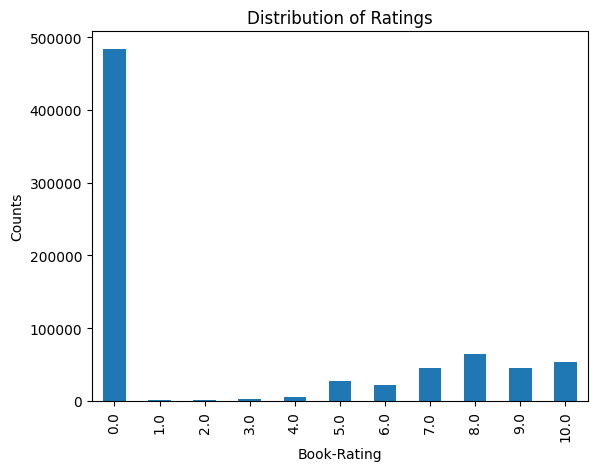

In [28]:
import matplotlib.pyplot as plt


book_ratings_users.groupby('Book-Rating')['ISBN'].count().plot.bar()
plt.xlabel("Book-Rating")
plt.ylabel("Counts")
plt.title("Distribution of Ratings")

In [29]:
#Popular 20 Books
print("################# Book Title #################  ################# Ratings ######################")
book_ratings_users.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:20]

################# Book Title #################  ################# Ratings ######################


Book-Title
Wild Animus                                                         2141
The Lovely Bones: A Novel                                            920
The Da Vinci Code                                                    708
Bridget Jones's Diary                                                599
The Nanny Diaries: A Novel                                           573
Angels &amp; Demons                                                  552
The Secret Life of Bees                                              547
A Painted House                                                      517
Life of Pi                                                           516
Divine Secrets of the Ya-Ya Sisterhood: A Novel                      514
The Red Tent (Bestselling Backlist)                                  472
The Notebook                                                         456
Harry Potter and the Chamber of Secrets (Book 2)                     425
The Pelican Brief                       

Text(0.5, 1.0, 'Count of Ratings of Popular Books')

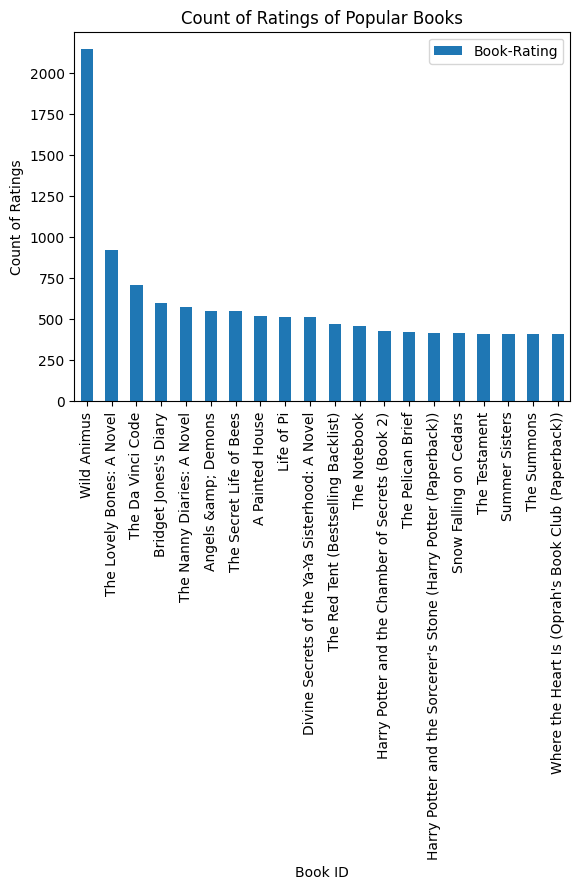

In [30]:
book_ratings_users.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False)[:20].plot.bar()
plt.xlabel("Book ID")
plt.ylabel("Count of Ratings")
plt.legend()
plt.title("Count of Ratings of Popular Books")

In [31]:
book_ratings_users_1 = book_ratings_users.copy()
book_ratings_users_1 = book_ratings_users_1[book_ratings_users_1['Book-Rating']>6]
popular_authors = book_ratings_users_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:20].index
popular_authors

Index(['Stephen King', 'Nora Roberts', 'John Grisham', 'J. K. Rowling',
       'James Patterson', 'Janet Evanovich', 'Dean R. Koontz',
       'Mary Higgins Clark', 'Dan Brown', 'Anne Rice', 'Sue Grafton',
       'Michael Crichton', 'Nicholas Sparks', 'JOHN GRISHAM', 'Alice Sebold',
       'Terry Pratchett', 'Tom Clancy', 'Anne McCaffrey',
       'William Shakespeare', 'Neil Gaiman'],
      dtype='object', name='Book-Author')

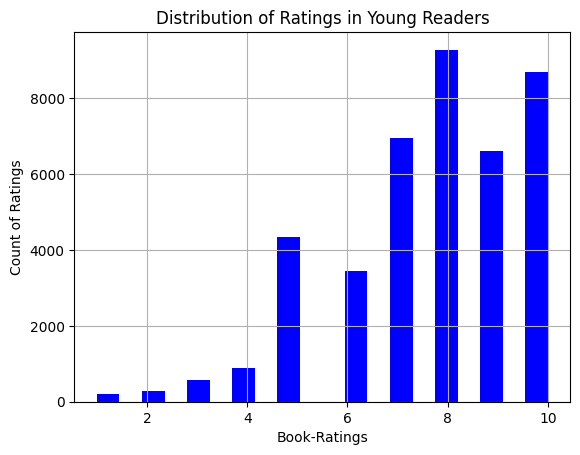

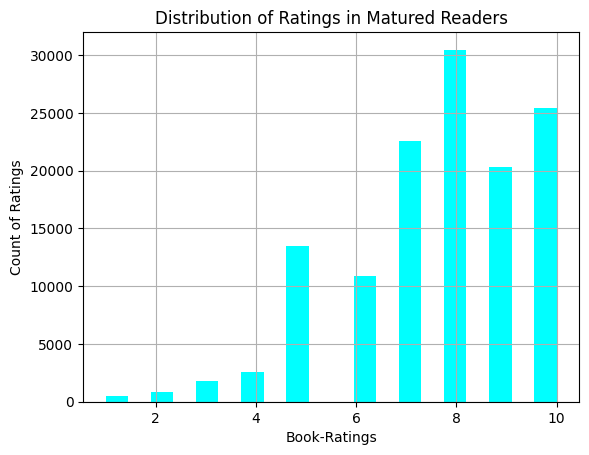

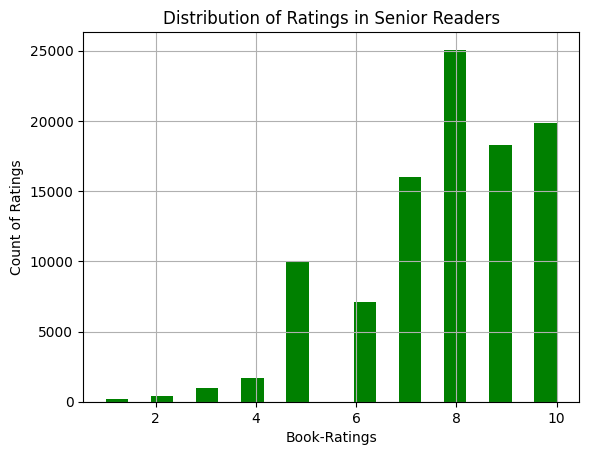

In [32]:
book_ratings_users_2 = book_ratings_users.copy()
book_ratings_users_2 = book_ratings_users_2[book_ratings_users_2['Book-Rating']!=0]
young_readers = book_ratings_users_2[book_ratings_users_2['Age']<25]
matured_readers = book_ratings_users_2[(book_ratings_users_2['Age']>=25) & (book_ratings_users_2['Age']<40)]
senior_readers = book_ratings_users_2[book_ratings_users_2['Age']>=40]

young_readers['Book-Rating'].hist(bins=20,color="blue")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Young Readers")
plt.show()

matured_readers['Book-Rating'].hist(bins=20,color="cyan")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Matured Readers")
plt.show()

senior_readers['Book-Rating'].hist(bins=20,color="green")
plt.xlabel("Book-Ratings")
plt.ylabel("Count of Ratings")
plt.title("Distribution of Ratings in Senior Readers")
plt.show()

Top 5 Authors' Book Ratings distribution among young readers


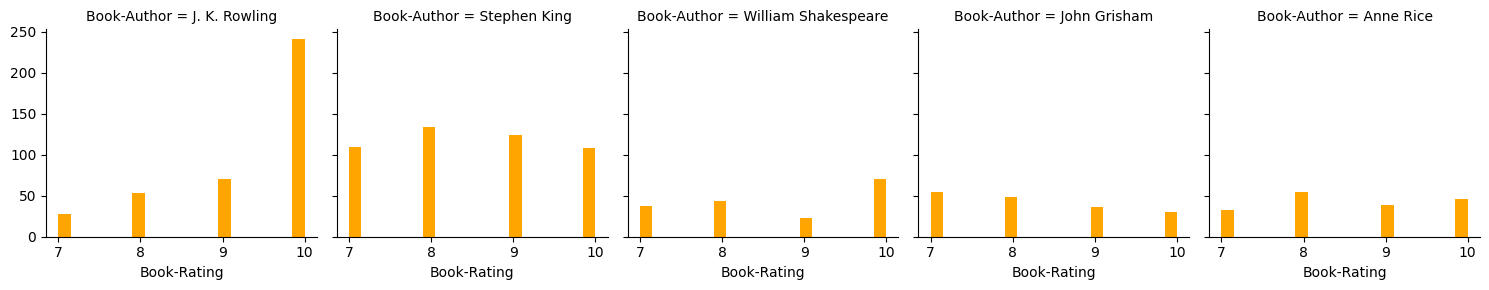

In [33]:
young_readers_1 = young_readers.copy()
young_readers_1 = young_readers_1[young_readers_1['Book-Rating']>6]
popular_authors_young = young_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among young readers")
young_readers_1 = young_readers_1[young_readers_1['Book-Author'].isin(popular_authors_young)]
graph = sns.FacetGrid(young_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.show()



Top 5 Authors' Book Ratings distribution among matured readers


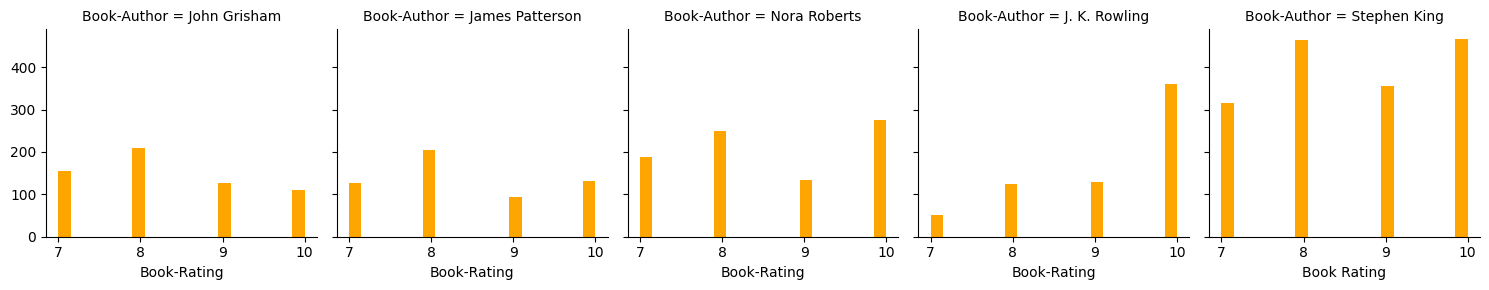

In [34]:
matured_readers_1 = matured_readers.copy()
matured_readers_1 = matured_readers_1[matured_readers_1['Book-Rating']>6]
popular_authors_matured = matured_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among matured readers")
matured_readers_1 = matured_readers_1[matured_readers_1['Book-Author'].isin(popular_authors_matured)]
graph = sns.FacetGrid(matured_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.xlabel("Book Rating")
plt.ylabel("Counts of Ratings")
plt.show()




Top 5 Authors' Book Ratings distribution among senior readers


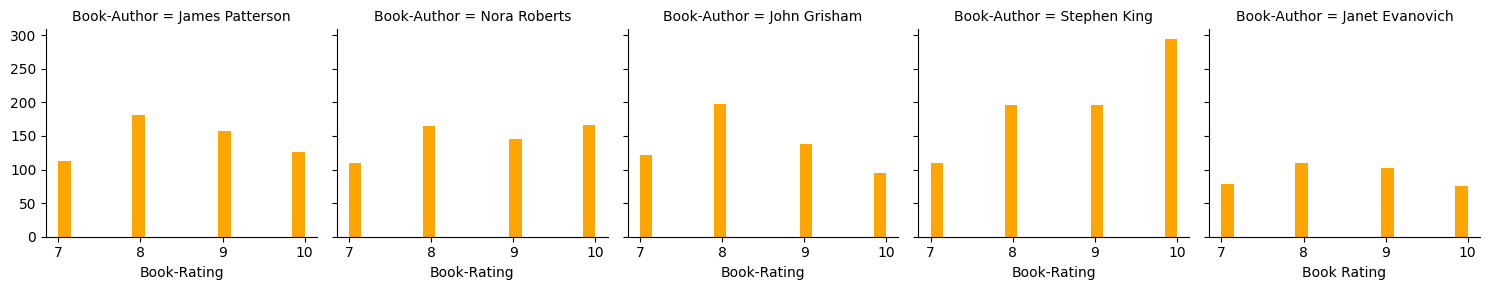

In [35]:
senior_readers_1 = senior_readers.copy()
senior_readers_1 = senior_readers_1[senior_readers_1['Book-Rating']>6]
popular_authors_senior = senior_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among senior readers")
senior_readers_1 = senior_readers_1[senior_readers_1['Book-Author'].isin(popular_authors_senior)]
graph = sns.FacetGrid(senior_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.xlabel("Book Rating")
plt.ylabel("Counts of Ratings")
plt.show()




Top 10 Publishers' Book Ratings distribution


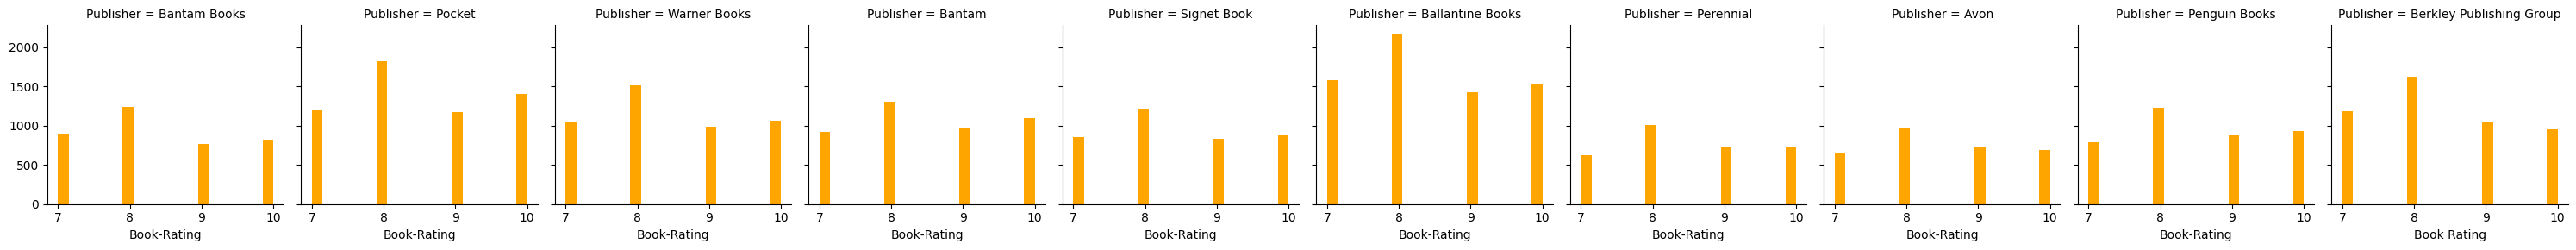

In [36]:
book_ratings_users_1 = book_ratings_users.copy()
book_ratings_users_1 = book_ratings_users_1[book_ratings_users_1['Book-Rating']>6]
popular_publishers = book_ratings_users_1.groupby('Publisher')['ISBN'].count().sort_values(ascending=False)[:10].index

print("Top 10 Publishers' Book Ratings distribution")
book_ratings_users_1 = book_ratings_users_1[book_ratings_users_1['Publisher'].isin(popular_publishers)]
graph = sns.FacetGrid(book_ratings_users_1,col='Publisher')
graph.map(plt.hist,'Book-Rating',bins=20,color='orange')
plt.xlabel("Book Rating")
plt.ylabel("Count of Ratings")
plt.show()

In [37]:
item_book_ratings = book_ratings_users.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(ratings_count = ('User-ID','count'),avg_rating=('Book-Rating','mean')).round(2)
item_book_ratings = item_book_ratings.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])
item_book_ratings.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Publisher', 'Image-URL-S',
       'Image-URL-M', 'Image-URL-L', 'ratings_count', 'avg_rating'],
      dtype='object')

In [38]:
len(item_book_ratings)

228996

In [39]:
item_book_ratings = item_book_ratings[item_book_ratings['Book-Author']!='Not Applicable (Na )']

In [40]:
np.mean(item_book_ratings[['avg_rating']])

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


avg_rating    2.822627
dtype: float64

In [41]:
np.mean(item_book_ratings[['ratings_count']])

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


ratings_count    3.291416
dtype: float64

In [42]:
top_rated_books = item_book_ratings[(item_book_ratings['avg_rating']>2.82) & (item_book_ratings['ratings_count']>3.28)]
top_rated_books = top_rated_books.sort_values(by='avg_rating',ascending=False).head(20)
top_rated_books.head(2)

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating
4287,0060280034,Dinotopia: A Land Apart from Time (Dinotopia),James Gurney,HarperCollins,http://images.amazon.com/images/P/0060280034.0...,http://images.amazon.com/images/P/0060280034.0...,http://images.amazon.com/images/P/0060280034.0...,4,10.0
17061,014050639X,Each Peach Pear Plum (Picture Puffins),Janet Ahlberg,Puffin Books,http://images.amazon.com/images/P/014050639X.0...,http://images.amazon.com/images/P/014050639X.0...,http://images.amazon.com/images/P/014050639X.0...,4,10.0


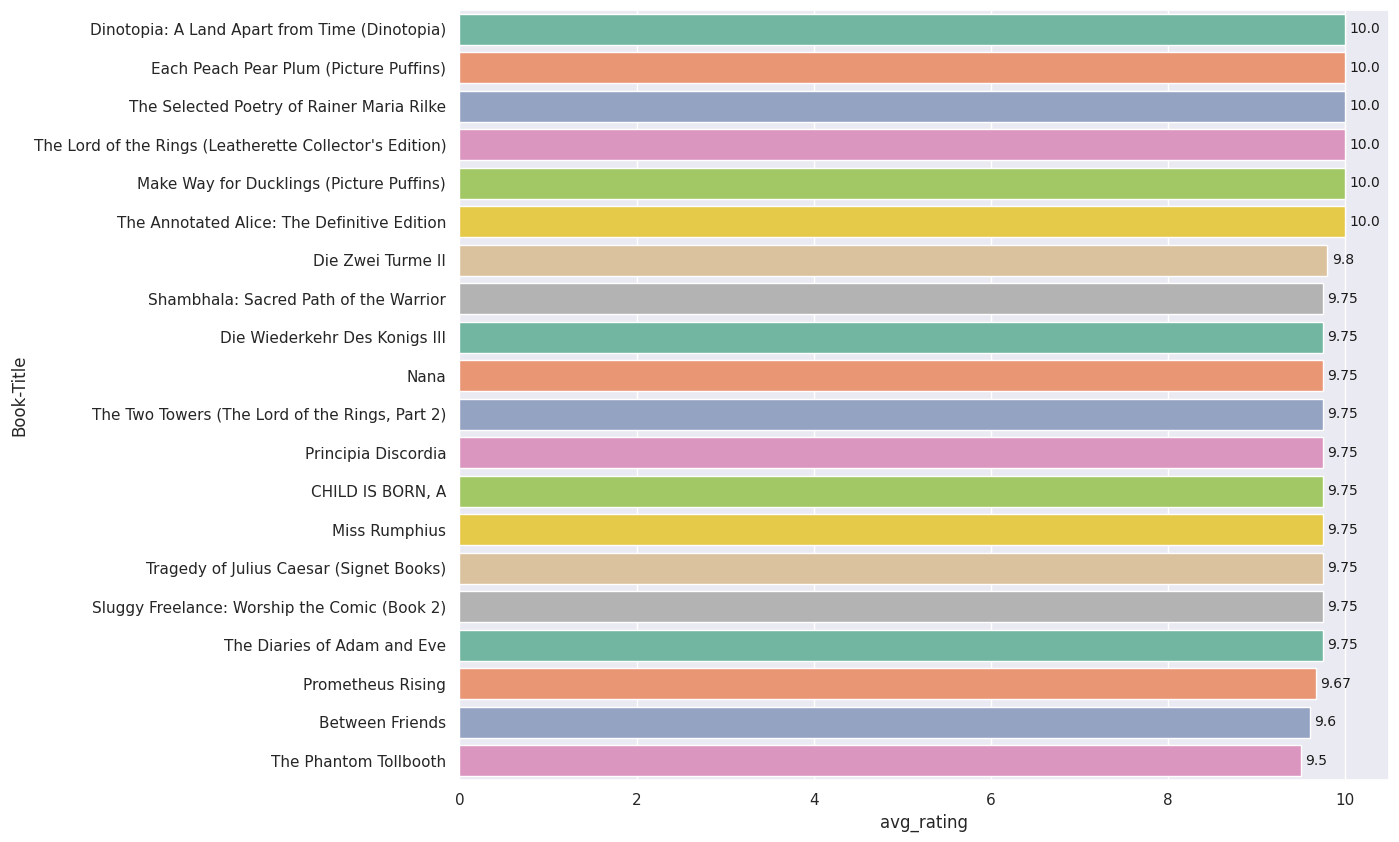

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='avg_rating',y='Book-Title',data=top_rated_books,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.show()

In [44]:
top_voted_books = item_book_ratings.sort_values(by='ratings_count',ascending=False).head(20)


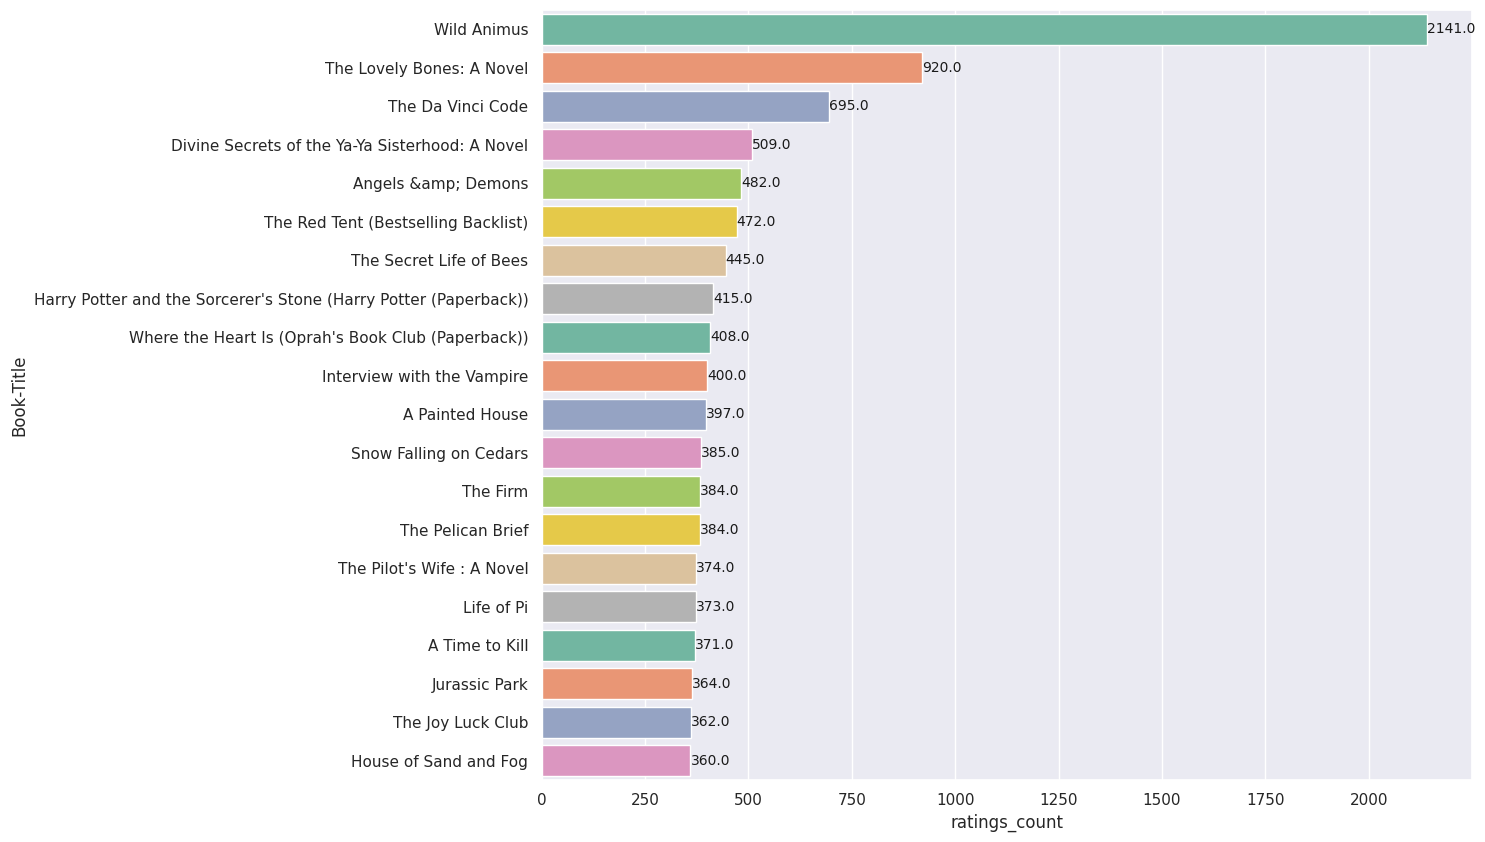

In [45]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='ratings_count',y='Book-Title',data=top_voted_books,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.show()

# Top Voted but not Top Rated

In [46]:
list(set(top_voted_books['Book-Title'])-set(top_rated_books['Book-Title']))

['A Time to Kill',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'The Secret Life of Bees',
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 'The Lovely Bones: A Novel',
 'House of Sand and Fog',
 'Life of Pi',
 'The Red Tent (Bestselling Backlist)',
 "The Pilot's Wife : A Novel",
 'Wild Animus',
 'Interview with the Vampire',
 'Jurassic Park',
 'The Da Vinci Code',
 'Angels &amp; Demons',
 "Where the Heart Is (Oprah's Book Club (Paperback))",
 'Snow Falling on Cedars',
 'The Pelican Brief',
 'The Joy Luck Club',
 'A Painted House',
 'The Firm']

# Top Rated but not top Voted

In [47]:
list(set(top_rated_books['Book-Title'])-set(top_voted_books['Book-Title']))

['Nana',
 'Shambhala: Sacred Path of the Warrior',
 'Tragedy of Julius Caesar (Signet Books)',
 "The Lord of the Rings (Leatherette Collector's Edition)",
 'Prometheus Rising',
 'Die Wiederkehr Des Konigs III',
 'Dinotopia: A Land Apart from Time (Dinotopia)',
 'The Two Towers (The Lord of the Rings, Part 2)',
 'Each Peach Pear Plum (Picture Puffins)',
 'The Diaries of Adam and Eve',
 'Miss Rumphius',
 'Principia Discordia',
 'The Selected Poetry of Rainer Maria Rilke',
 'CHILD IS BORN, A',
 'Make Way for Ducklings (Picture Puffins)',
 'The Phantom Tollbooth',
 'Die Zwei Turme II',
 'Sluggy Freelance: Worship the Comic (Book 2)',
 'The Annotated Alice: The Definitive Edition',
 'Between Friends']

# Relationship between Rating and Vote

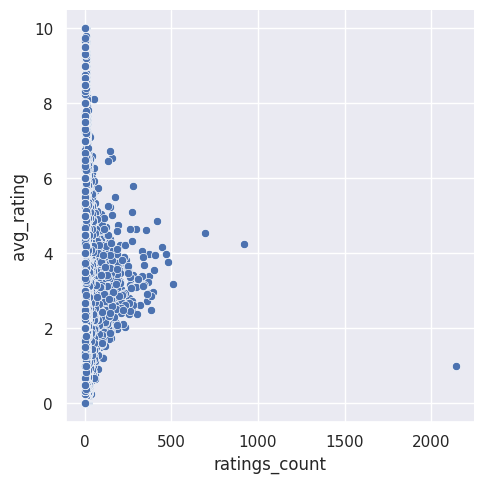

In [48]:
ax = sns.relplot(x='ratings_count',y='avg_rating',data= item_book_ratings,marker='o')

As the rating count increases the mean of ratings is getting in between 2 to 4

In [49]:
item_book_ratings['Book-Author'].unique()

array(['C. van Amerongen (translator)', 'Judith Kerr', 'Helen Forrester',
       ..., 'Mark Shepard', 'Rachel Abramowitz',
       'P Ed Varnedoe/Antonelli Kick'], dtype=object)

In [50]:
def get_only_author(authors):
    return authors.split('/')[0]

In [51]:
df_only_author = item_book_ratings.copy()

In [52]:
df_only_author['pr_author'] = df_only_author['Book-Author'].apply(lambda x: get_only_author(x))


In [53]:
len(df_only_author)

228762

In [54]:
total_rating = df_only_author.drop_duplicates(subset=['pr_author', 'Book-Title'], keep='first')
len(total_rating)

212307

In [55]:
total_ratings = df_only_author.groupby('pr_author').agg(total_ratings=('avg_rating','sum')).reset_index()
total_ratings = total_ratings.sort_values(by='total_ratings',ascending=False)
total_ratings

,pr_author,total_ratings
86300,William Shakespeare,2102.78
78004,Stephen King,1792.61
934,Agatha Christie,1600.69
80900,Terry Pratchett,1142.94
34155,Isaac Asimov,946.42
...,...,...
40703,Joanne Gise,0.00
40706,Joanne H. Meehl,0.00
40708,Joanne Hatch Bruch,0.00
40709,Joanne Hollows,0.00


In [56]:
total_books = df_only_author.groupby('pr_author').agg(total_books=('Book-Title','nunique')).reset_index()
total_books = total_books.sort_values(by='total_books',ascending=False)
total_books

,pr_author,total_books
86300,William Shakespeare,448
934,Agatha Christie,436
3926,Ann M. Martin,338
26193,Francine Pascal,319
11572,Carolyn Keene,309
...,...,...
34213,Isabelle Hausser,1
34215,Isabelle Knockwood,1
34216,Isabelle Muller,1
34217,Isabelle Patrick,1


In [57]:
np.max(total_books['total_books'])

448

In [58]:
avg_r_by_author = pd.merge(total_ratings, total_books, on = 'pr_author', how ='outer')
avg_r_by_author = avg_r_by_author[avg_r_by_author['total_books']>150]
avg_r_by_author['avg_rat_by_a'] = np.round(avg_r_by_author['total_ratings']/avg_r_by_author['total_books'],2)
avg_r_by_author = avg_r_by_author.sort_values(by='avg_rat_by_a',ascending=False)
avg_r_by_author

,pr_author,total_ratings,total_books,avg_rat_by_a
1,Stephen King,1792.61,277,6.47
3,Terry Pratchett,1142.94,191,5.98
6,Mark Twain,773.03,155,4.99
0,William Shakespeare,2102.78,448,4.69
8,Marion Zimmer Bradley,710.59,171,4.16
4,Isaac Asimov,946.42,256,3.70
2,Agatha Christie,1600.69,436,3.67
15,Mary Higgins Clark,553.85,154,3.60
13,Piers Anthony,603.90,169,3.57
16,Diana Palmer,550.09,155,3.55


# Weighted Rating Calculation

In [59]:
total_vote = df_only_author.drop_duplicates(subset=['pr_author', 'Book-Title'], keep='first')
total_vote.reset_index(inplace=True)
total_vote = total_vote[['pr_author', 'Book-Title', 'avg_rating', 'ratings_count']]
total_vote

,pr_author,Book-Title,avg_rating,ratings_count
0,C. van Amerongen (translator),The Way Things Work: An Illustrated Encycloped...,8.0,1
1,Judith Kerr,Mog's Christmas,0.0,1
2,Helen Forrester,Twopence to Cross the Mersey,0.0,1
3,Muriel Spark,The Prime of Miss Jean Brodie,0.0,1
4,Jeffrey Archer,Matter Of Honour,0.0,1
...,...,...,...,...
212302,Bruce Wagner,I'll Let You Go: A Novel,0.0,1
212303,David Rakoff,Fraud,9.0,1
212304,Elizabeth Buchan,"Good Wife Strikes Back, The",0.0,1
212305,Jules Verne,The Blockade Runners,0.0,1


In [60]:
C = total_vote.avg_rating.mean()
C

2.8264973835059606

In [61]:
m = total_vote.ratings_count.quantile(0.9998)
m

214.07760000001872

In [62]:
total_vote = total_vote[total_vote.ratings_count>=m]
total_vote.head()

,pr_author,Book-Title,avg_rating,ratings_count
4409,Rebecca Wells,The Divine Secrets of the Ya-Ya Sisterhood: A ...,3.30,269
5900,Rebecca Wells,Divine Secrets of the Ya-Ya Sisterhood: A Novel,3.17,509
5963,Barbara Kingsolver,The Poisonwood Bible: A Novel,3.31,321
6051,Ann Patchett,Bel Canto: A Novel,3.56,233
6143,Eric Schlosser,Fast Food Nation: The Dark Side of the All-Ame...,3.73,222


In [63]:
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['avg_rating']
    return np.round(((v * R) + (m * C))/(m + v),2)

In [64]:
total_vote['weighted_rating'] = total_vote.apply(weighted_rating,axis=1)

<ipython-input-64-fc4890853217>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_vote['weighted_rating'] = total_vote.apply(weighted_rating,axis=1)


In [65]:
total_vote = total_vote.sort_values(by='weighted_rating',ascending=False).head(20)
total_vote.head()

,pr_author,Book-Title,avg_rating,ratings_count,weighted_rating
68447,J. K. Rowling,Harry Potter and the Order of the Phoenix (Boo...,5.80,280,4.51
99327,J. K. Rowling,Harry Potter and the Sorcerer's Stone (Harry P...,4.85,415,4.16
58121,Dan Brown,The Da Vinci Code,4.53,695,4.13
30861,Alice Sebold,The Lovely Bones: A Novel,4.24,920,3.97
133596,Mitch Albom,The Five People You Meet in Heaven,4.61,356,3.94


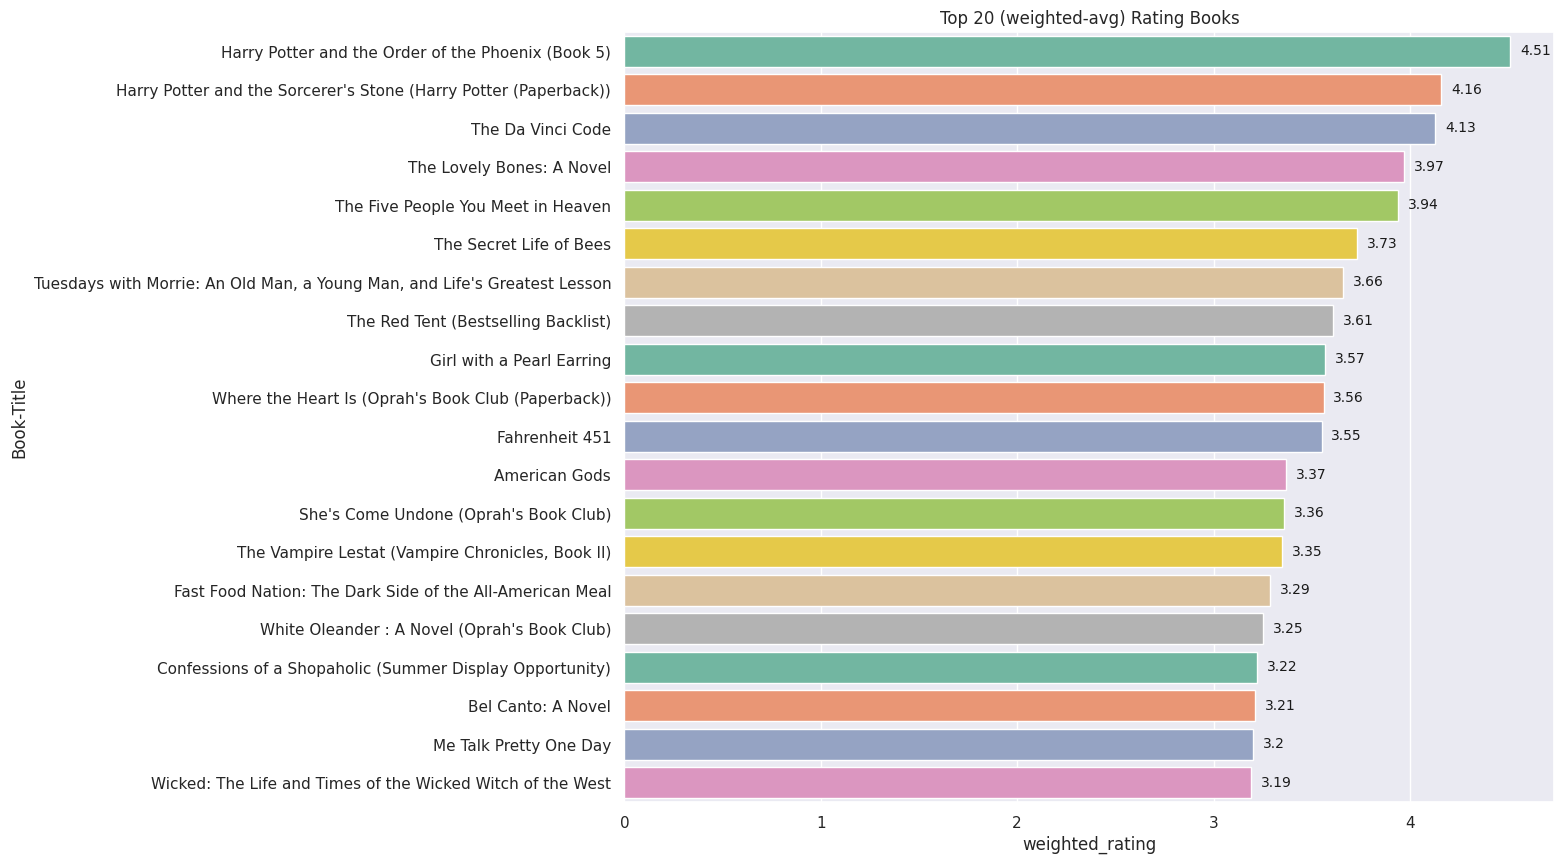

In [66]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='weighted_rating',y='Book-Title',data=total_vote,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.title("Top 20 (weighted-avg) Rating Books")
plt.show()

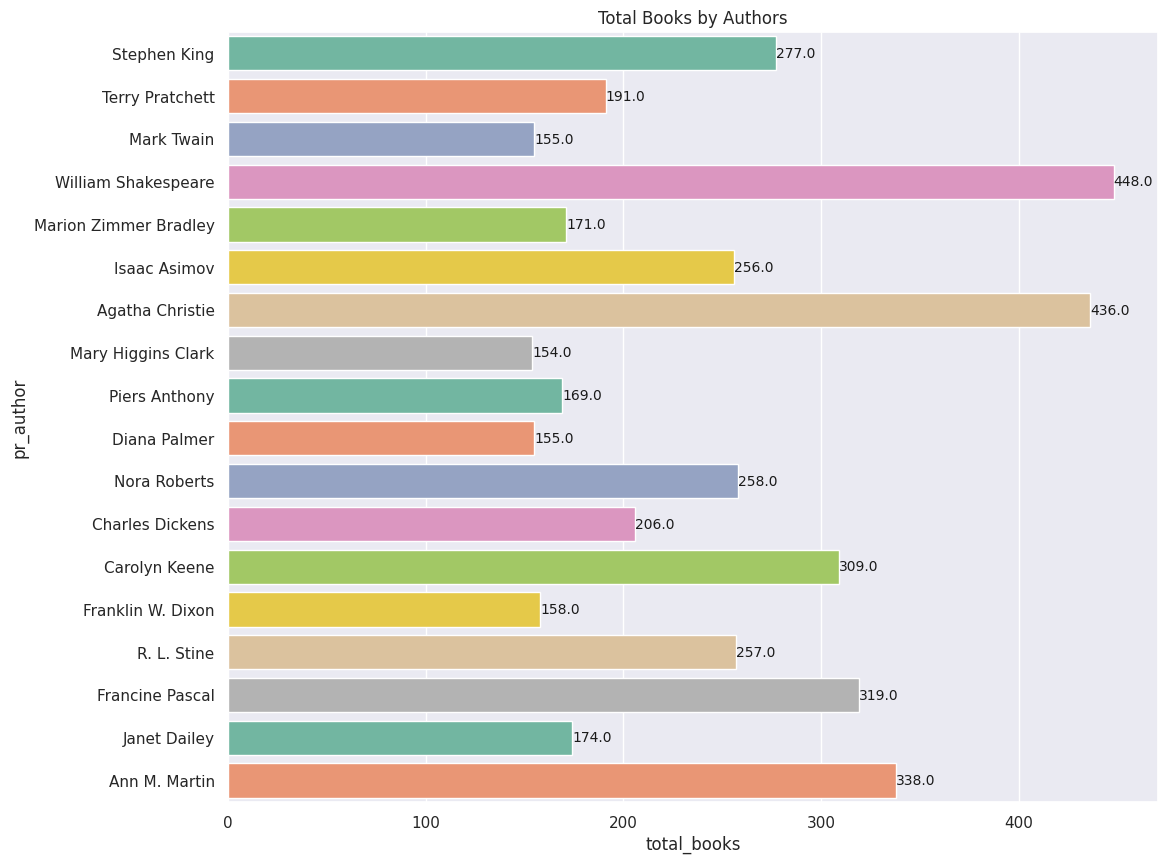

In [67]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='total_books',y='pr_author',data=avg_r_by_author,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.title("Total Books by Authors")
plt.show()

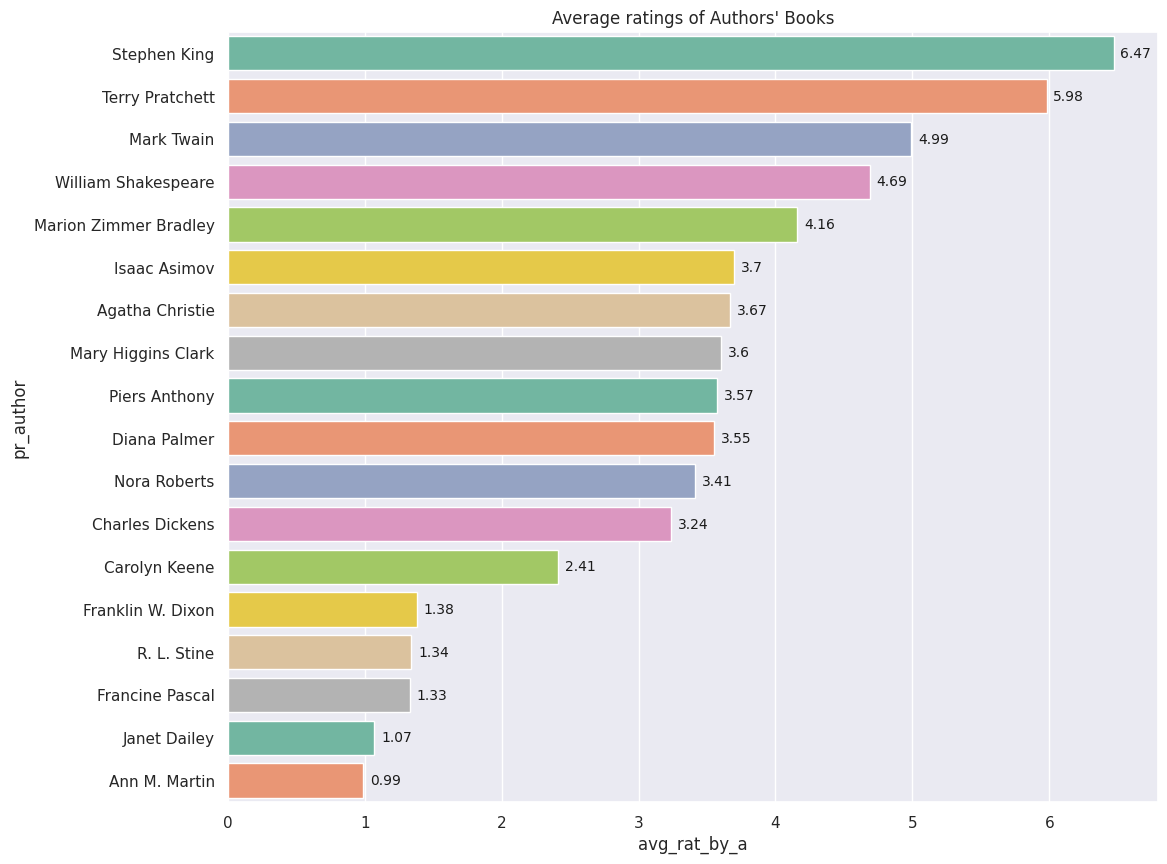

In [68]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,10))
color = sns.color_palette('Set2')
ax = sns.barplot(x='avg_rat_by_a',y='pr_author',data=avg_r_by_author,palette=color)

for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10, color='k')
plt.title("Average ratings of Authors' Books")
plt.show()

In [69]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
titles = item_book_ratings['Book-Title'].unique()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

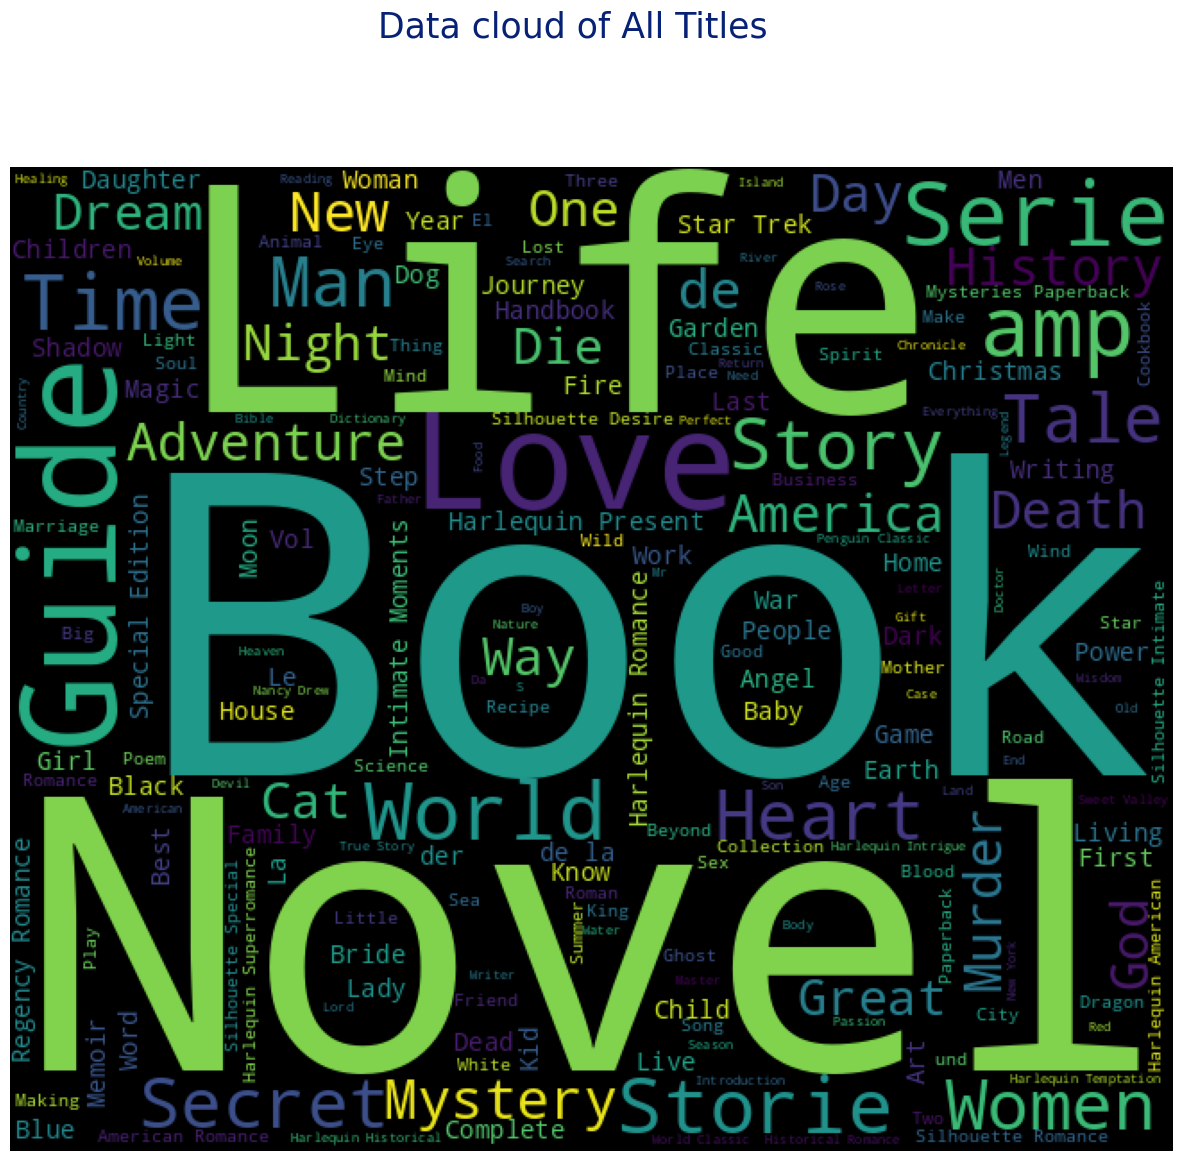

In [71]:
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='#000',
                          width=650,
                          height=550,
                          stopwords=STOPWORDS,
                         ).generate(" ".join(titles))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Data cloud of All Titles', color='#062175', fontsize=25, ha='center')
plt.show()

# Item-Based Recommendation Engine

In [72]:
# Creating rating_between new feature
df_only_author.loc[ (df_only_author['avg_rating'] >= 0) & (df_only_author['avg_rating'] <= 1), 'rating_between'] = "between_0_to_1"
df_only_author.loc[ (df_only_author['avg_rating'] > 1) & (df_only_author['avg_rating'] <= 2), 'rating_between'] = "between_1_to_2"
df_only_author.loc[ (df_only_author['avg_rating'] > 2) & (df_only_author['avg_rating'] <= 3), 'rating_between'] = "between_2_to_3"
df_only_author.loc[ (df_only_author['avg_rating'] > 3) & (df_only_author['avg_rating'] <= 4), 'rating_between'] = "between_3_to_4"
df_only_author.loc[ (df_only_author['avg_rating'] > 4) & (df_only_author['avg_rating'] <= 5), 'rating_between'] = "between_4_to_5"
df_only_author.loc[ (df_only_author['avg_rating'] > 5) & (df_only_author['avg_rating'] <= 6), 'rating_between'] = "between_5_to_6"
df_only_author.loc[ (df_only_author['avg_rating'] > 6) & (df_only_author['avg_rating'] <= 7), 'rating_between'] = "between_6_to_7"
df_only_author.loc[ (df_only_author['avg_rating'] > 7) & (df_only_author['avg_rating'] <= 8), 'rating_between'] = "between_7_to_8"
df_only_author.loc[ (df_only_author['avg_rating'] > 8) & (df_only_author['avg_rating'] <= 9), 'rating_between'] = "between_8_to_9"
df_only_author.loc[ (df_only_author['avg_rating'] > 9) & (df_only_author['avg_rating'] <= 10), 'rating_between'] = "between_9_to_10"


In [73]:
df_only_author.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,ratings_count,avg_rating,pr_author,rating_between
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,1,8.0,C. van Amerongen (translator),between_7_to_8
1,0001010565,Mog's Christmas,Judith Kerr,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,1,0.0,Judith Kerr,between_0_to_1
2,0001046713,Twopence to Cross the Mersey,Helen Forrester,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,1,0.0,Helen Forrester,between_0_to_1
3,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,1,0.0,Muriel Spark,between_0_to_1
4,0001047663,Matter Of Honour,Jeffrey Archer,Trafalgar Square Books,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,1,0.0,Jeffrey Archer,between_0_to_1


In [74]:

trial = df_only_author[['avg_rating', 'ratings_count']]
data_model = np.asarray([np.asarray(trial['avg_rating']), np.asarray(trial['ratings_count'])]).T
data_model

array([[8., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [75]:
from sklearn.cluster import KMeans

# Elbow Method
score = []
x = data_model
for cluster in range(1,41):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=40)
    kmeans.fit(x)
    score.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

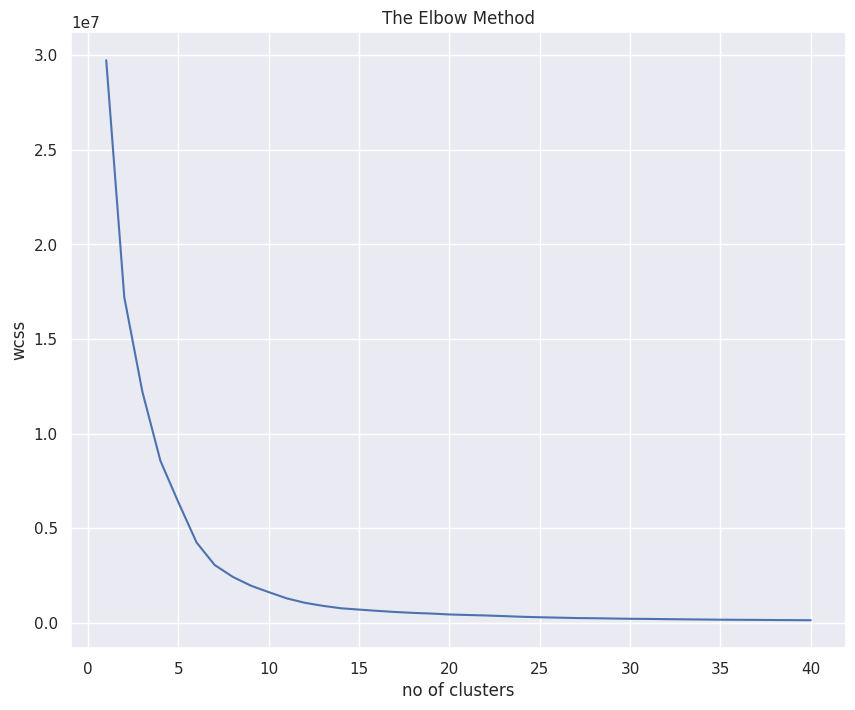

In [76]:
# plotting the score
plt.figure(figsize=(10, 8))
plt.plot(range(1,41), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [77]:
rating_between_df = df_only_author['rating_between'].str.get_dummies(sep=",")
rating_between_df.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,between_5_to_6,between_6_to_7,between_7_to_8,between_8_to_9,between_9_to_10
0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [78]:
engine_features = pd.concat([rating_between_df,df_only_author['avg_rating'],df_only_author['ratings_count']],axis=1)
engine_features.head()

,between_0_to_1,between_1_to_2,between_2_to_3,between_3_to_4,between_4_to_5,between_5_to_6,between_6_to_7,between_7_to_8,between_8_to_9,between_9_to_10,avg_rating,ratings_count
0,0,0,0,0,0,0,0,1,0,0,8.0,1
1,1,0,0,0,0,0,0,0,0,0,0.0,1
2,1,0,0,0,0,0,0,0,0,0,0.0,1
3,1,0,0,0,0,0,0,0,0,0,0.0,1
4,1,0,0,0,0,0,0,0,0,0,0.0,1


In [79]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
engine_features_scaled = min_max_scaler.fit_transform(engine_features)

In [80]:
from sklearn import neighbors
engine_model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
engine_model.fit(engine_features_scaled)

NearestNeighbors(algorithm='ball_tree', n_neighbors=6)

In [ ]:
dist, idlist = engine_model.kneighbors(engine_features_scaled)
idlist

In [ ]:
def book_recommendation_engine(book_name):
    book_list_name = []
    book_id = df_only_author[df_only_author['Book-Title'] == book_name].index
    book_id = book_id[0]

    for sim_b_id in idlist[book_id]:
        book_list_name.append(df_only_author.loc[sim_b_id]['Book-Title'])
    return book_list_name

In [ ]:
book_list_name = book_recommendation_engine('The Lovely Bones: A Novel')
book_list_name[1:]

# Book Recommendation using Surprise

In [1]:
import os
import random
import operator
import requests
import numpy as np
import pandas as pd
from scipy import sparse
import sys
from surprise import Dataset, Reader
from surprise import KNNBasic, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.dataset import DatasetAutoFolds
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/book-recomd/Ratings.csv', error_bad_lines=False, warn_bad_lines=False,skiprows=lambda i: i>0 and random.random() > 0.02)
#df_playlist=df_playlist.drop('timestamp',axis=1)
display(df[0:5])
print(df['Book-Rating'].unique().tolist())
print(len(df))
print(len(df['User-ID'].unique().tolist()))
print(len(df['ISBN'].unique().tolist()))

In [ ]:
reader = Reader(rating_scale=(0,10)) # rating scale range
data = Dataset.load_from_df(df[['User-ID', 'ISBN', 'Book-Rating']], reader)
print(type(data))

In [ ]:
# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.1)
print(type(trainset))

In [ ]:
#Splitting the Data into Vaidation:
trainset, validset = train_test_split(trainset, test_size = 0.1)

In [ ]:
import itertools

for uid, iid, rating in itertools.islice(trainset.all_ratings(), 5):
    print(f"User {uid} rated item {iid} with a rating of {rating}")

print()
for uid, iid, rating in testset[:10]:
    print(f"User {uid} rated item {iid} with a rating of {rating}")
    
print()    
print(trainset.n_ratings,len(testset))

User 0 rated item 0 with a rating of 0.0
User 0 rated item 596 with a rating of 0.0
User 0 rated item 770 with a rating of 0.0
User 0 rated item 1127 with a rating of 0.0
User 0 rated item 5286 with a rating of 0.0

User 100906 rated item 1880448483 with a rating of 7.0
User 10118 rated item 0380791986 with a rating of 0.0
User 214786 rated item 0425177351 with a rating of 0.0
User 107021 rated item 0373029543 with a rating of 0.0
User 35859 rated item 0425089037 with a rating of 0.0
User 21202 rated item 0446813591 with a rating of 9.0
User 87555 rated item 0965605914 with a rating of 0.0
User 152645 rated item 0452271681 with a rating of 0.0
User 135793 rated item 0425107469 with a rating of 6.0
User 214138 rated item 051513628X with a rating of 8.0

18382 4596


In [ ]:
# Use the SVD algorithm to train the model
#algo = KNNBasic()
algo = SVD()
algo.fit(trainset)

In [ ]:
# Test the model on the testing set
predictions = algo.test(testset)

In [ ]:
for uid, iid, rating in testset[:5]:
    print(f"User {uid} rated item {iid} with a rating of {rating}")

User 100906 rated item 1880448483 with a rating of 7.0
User 10118 rated item 0380791986 with a rating of 0.0
User 214786 rated item 0425177351 with a rating of 0.0
User 107021 rated item 0373029543 with a rating of 0.0
User 35859 rated item 0425089037 with a rating of 0.0


In [ ]:
for prediction in predictions[0:5]:
    print(prediction)

user: 100906     item: 1880448483 r_ui = 7.00   est = 2.96   {'was_impossible': False}
user: 10118      item: 0380791986 r_ui = 0.00   est = 2.87   {'was_impossible': False}
user: 214786     item: 0425177351 r_ui = 0.00   est = 1.75   {'was_impossible': False}
user: 107021     item: 0373029543 r_ui = 0.00   est = 0.96   {'was_impossible': False}
user: 35859      item: 0425089037 r_ui = 0.00   est = 0.33   {'was_impossible': False}


In [ ]:
# Print the performance metrics
accuracy.mae(predictions)

MAE:  3.1378


3.1377732037779835

In [ ]:
# Print the performance metrics
accuracy.mse(predictions)

MSE: 12.9468


12.94681097211361

In [ ]:
# Print the performance metrics
accuracy.rmse(predictions)

RMSE: 3.5982


3.5981677242887957

In [ ]:
true_ratings = [pred.r_ui for pred in predictions]
est_ratings = [pred.est for pred in predictions]
uids = [pred.uid for pred in predictions]

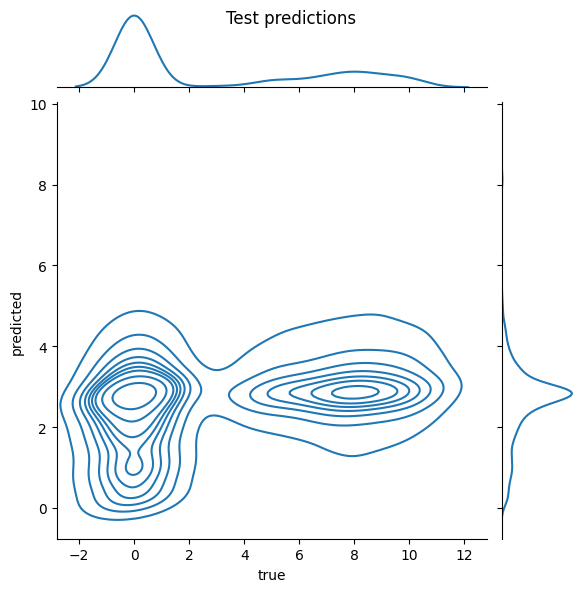

In [ ]:
data=pd.DataFrame(columns=["true","predicted"])
data["true"]=true_ratings
data["predicted"]=est_ratings
g = sns.jointplot(data=data,x="true", y="predicted", kind="kde",)
g.fig.suptitle('Test predictions',fontsize=12)
plt.show()

# Recommend unseen movies for test set users

In [ ]:
users=list(set(uids))
print(users[0:10])

[81921, 49154, 122881, 32773, 131081, 9, 204813, 229391, 98322, 139287]


In [ ]:
# items which the user not yet evaluate
items = trainset.build_anti_testset()
for user in users[0:10]:
    user_items = list(filter(lambda x: x[0] == user, items))
    print()
    print(user,len(user_items))
    # generate recommendation
    recommendations = algo.test(user_items)
    recommendations.sort(key=operator.itemgetter(3), reverse=True)
    print(f"User {user} recommendations:")
    for r in recommendations[0:5]:
        print(f"  Item {r[1]} with estimated rating {r[3]}")


81921 0
User 81921 recommendations:

49154 15341
User 49154 recommendations:
  Item 0439136369 with estimated rating 4.822264571520697
  Item 0316666343 with estimated rating 4.728937045008681
  Item 0441790348 with estimated rating 4.51344464160258
  Item 0786867647 with estimated rating 4.495023491368769
  Item 0553277472 with estimated rating 4.351000267916667

122881 15340
User 122881 recommendations:
  Item 0316666343 with estimated rating 5.4452964714157535
  Item 0380002930 with estimated rating 4.998671214406375
  Item 0439136369 with estimated rating 4.949371633890756
  Item 0894805770 with estimated rating 4.936991270983436
  Item 0312971230 with estimated rating 4.711540141262257

32773 15333
User 32773 recommendations:
  Item 0316666343 with estimated rating 4.746557426091766
  Item 0312971230 with estimated rating 4.200956368295199
  Item 0439136369 with estimated rating 4.12704556147775
  Item 0894805770 with estimated rating 4.1027805710289895
  Item 0553582755 with est